<a href="https://colab.research.google.com/github/arunimamuralitharan/mllab/blob/main/knn_w_packages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

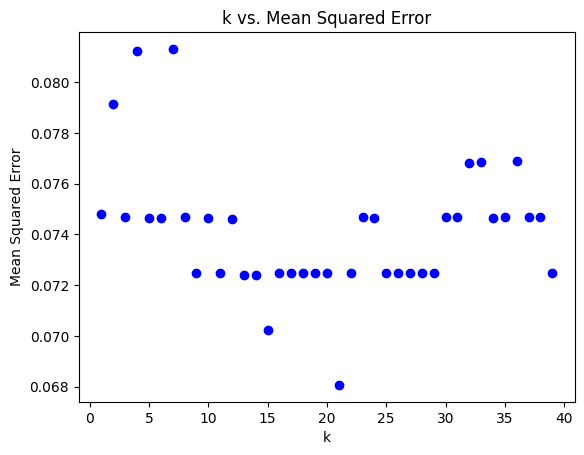

Mean Absolute Error: 0.06140350877192982
Mean Squared Error: 0.06140350877192982
Root Mean Squared Error: 0.24779731389167603
Accuracy: 93.85964912280701


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# Load the breast cancer dataset
df = pd.read_csv("https://raw.githubusercontent.com/arunimamuralitharan/mllab/main/breast-cancer.csv")

# Data preprocessing
df = df.drop(columns=['id', 'Unnamed: 32'])
cancer_type = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(cancer_type)

# Split features and target variable
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# Cross-validation to find the optimal k value
nbr = []
cv_score = []
for k in range(1, 40):
    nbr.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_score.append(scores.mean())
MSE = [1 - x for x in cv_score]
optk = nbr[MSE.index(max(MSE))]

# Plot k values vs. Mean Squared Error
plt.scatter(nbr, MSE, marker='o', color='blue')  # Specify marker and color
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('k vs. Mean Squared Error')
plt.show()

# Train and test the model with the optimal k value
test_model = KNeighborsClassifier(n_neighbors=optk)
test_model.fit(X_train, y_train)
prediction = test_model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
print("Mean Squared Error:", mean_squared_error(y_test, prediction))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, prediction)))
print('Accuracy:', accuracy_score(prediction, y_test) * 100)
